# __Data Wrangling__

## __Agenda__

- Introduction to Data Wrangling
- Data Collection
- Data Inspection
  * Accessing Rows Using .iloc and .loc
  * Checking for Missing Values
  * Handling Missing Data
- Dealing with Duplicates
- Data Cleaning
- Data Transformation
- Data Binning
- Handling Outliers
- Pandas Joining Techniques
    * Pandas Concatenate
    * Pandas Merge Dataframes
    * Pandas Join Dataframes
- Aggregating Data
- Reshaping Data

## __1. Introduction to Data Wrangling__
Data wrangling, also known as data munging or data preprocessing, is the process of cleaning, structuring, and transforming raw data into a format suitable for analysis.
- It is a crucial step in the data preparation pipeline, aiming to make the data more accessible, understandable, and ready for various analytical tasks.
- It involves dealing with missing values, handling outliers, transforming variables, and merging datasets, among other tasks.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Introduction.png)

## __2. Data Collection:__

Data collection is the process of gathering information from diverse sources to build a comprehensive dataset for analysis.
- Sources may include databases, APIs (application programming interfaces), spreadsheets, or external files. Effective data collection ensures the availability of relevant and reliable information.

### __Loading Data:__
Start by loading data into a Pandas DataFrame

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Loading.png)

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('HousePrices.csv')

## __3. Data Inspection__
It involves exploring the dataset to gain insights into its structure and quality.
- This step involves using functions like df.head(), df.info(), and df.describe() to gain insights into the dataset's structure, data types, and statistical summaries. Checking for missing values, outliers, and inconsistencies is crucial to identify potential issues that need addressing.

In [ ]:
# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
print(df.tail())

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())

# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
print(df.describe())

# Displaying datatypes of the columns
df.dtypes

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

### __3.1 Accessing Rows Using .iloc and .loc__
Inspecting the dataset involves exploring its content.
- Using .iloc and .loc allows you to access specific rows based on integer-location or label-based indexing, respectively.

In [ ]:
# Access the first row using iloc
result_iloc_0 = df.iloc[0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)
print()

# Access the eleventh row using iloc
result_iloc_10 = df.iloc[10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)


Result for df.iloc[0]:
date              2014-05-02 00:00:00
price                        313000.0
bedrooms                          3.0
bathrooms                         1.5
sqft_living                      1340
sqft_lot                         7912
floors                            1.5
waterfront                          0
view                                0
condition                           3
sqft_above                       1340
sqft_basement                       0
yr_built                         1955
yr_renovated                     2005
street           18810 Densmore Ave N
city                        Shoreline
statezip                     WA 98133
country                           USA
Name: 0, dtype: object

Result for df.iloc[10]:
date             2014-05-02 00:00:00
price                       463000.0
bedrooms                         3.0
bathrooms                       1.75
sqft_living                     1710
sqft_lot                        7320
floors                 

### __3.2 Checking for Missing Values__
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Checking_for_missing_values.png)

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### __3.3 Handling Missing Data__
Handling missing data is crucial for maintaining data integrity. Various approaches include imputation (replacing missing values with estimated values), the removal of records with missing values, or using default values when appropriate.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Handling_missing_data.png)

To handle missing values in numerical columns of the dataset, we utilize `iloc` to select them, excluding text columns. Thus, we focus solely on columns 1 to 14, which do not contain text data.

In [ ]:
# Handling missing values using imputation
df_filled = df.fillna(df.iloc[:, 1:14].mean())

## __4. Dealing with Duplicates__

Duplicates in a dataset can introduce bias and errors.
- Identifying and handling duplicate records is essential for ensuring accurate analysis and reporting.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Dealing_with_duplicates.png)

In [ ]:
# Removing duplicate records
df_no_duplicates = df.drop_duplicates()

By default, `drop_duplicates()` retains the first occurrence of a duplicate and removes subsequent ones. This behavior can be changed using the `keep` parameter, if specified otherwise.

## __5. Data Cleaning__

This includes correcting typographical errors, standardizing date formats, and resolving inconsistencies in categorical data labeling.
- Standardizing data formats and units ensures consistency and facilitates analysis.

In [ ]:
# Cleaning data by standardizing formats
df['date'] = pd.to_datetime(df['date'])
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
print(df)

DataFrame after cleaning data by standardizing formats:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  water

## __6. Data Transformation__

Data transformation includes converting data types, creating new features through feature engineering, and normalizing or scaling numeric values as needed.

In [ ]:
# Creating a new feature and normalizing numeric values
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Price'] = df['price'].apply(lambda x: np.log(x))

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Normalized_Price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

    # Displaying the DataFrame with the new features
    print("DataFrame with new features:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with new features:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  sqf

## __7. Data Binning__
Data binning, also known as discretization, is a technique in data transformation to convert continuous numerical data into discrete bins or intervals.
- This process helps simplify the analysis of trends, handle outliers, and make data more suitable for certain types of analyses or machine learning algorithms.
- It involves grouping numeric values into predefined ranges, creating a categorical representation of the data.

In [ ]:
# Data Binning: Creating bins for the 'price' column
# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Define bin edges
    bin_edges = [0, 100, 200, 300, 400, 500, np.inf]  # Adjust bin edges as needed

    # Define bin labels
    bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501+']

    # Create a new categorical column 'Price_Category' based on binning
    df['Price_Category'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)

    # Displaying the DataFrame with the new 'Price_Category' column
    print("DataFrame with Price_Category column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")


DataFrame with Price_Category column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condi

## __8. Handling Outliers__

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

**Winsorization:** It is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

In [ ]:
# Handling outliers by winsorizing
from scipy.stats.mstats import winsorize

# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Winsorizing the 'price' column with limits [0.05, 0.05]
    df['Winsorized_Price'] = winsorize(df['price'], limits=[0.05, 0.05])

    # Displaying the DataFrame with the winsorized column
    print("DataFrame with winsorized column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with winsorized column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05       3.0       1.50         1340      7912   
1    2014-05-02  2.384000e+06       5.0       2.50         3650      9050   
2    2014-05-02  3.420000e+05       3.0       2.00         1930     11947   
3    2014-05-02  4.200000e+05       3.0       2.25         2000      8030   
4    2014-05-02  5.500000e+05       4.0       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05       3.0       1.75         1510      6360   
4596 2014-07-09  5.343333e+05       3.0       2.50         1460      7573   
4597 2014-07-09  4.169042e+05       3.0       2.50         3010      7014   
4598 2014-07-10  2.034000e+05       4.0       2.00         2090      6630   
4599 2014-07-10  2.206000e+05       3.0       2.50         1490      8102   

      floors  waterfront  view  condition

## __9. Pandas Joining Techniques__

Pandas provides various joining techniques, such as merging, joining, and concatenating, which allow datasets to be combined using one or more keys. Each method has unique behaviors and applications.


- **Concatenate**: It appends DataFrames vertically or horizontally, offering a straightforward way to combine datasets with distinct columns or indices without regard for overlapping keys or index values.

- **Merge**: It combines DataFrames by aligning columns with shared keys, allowing for detailed control over overlapping column names and the use of multiple keys.

- **Join**: It aligns DataFrames based on their index values, making it ideal for coordinating data with corresponding indices.

These techniques are essential for integrating and analyzing different datasets. They enable a thorough understanding and help in making informed decisions in data-driven applications.

### __9.1 Pandas Concatenate__

- The __pd.concat()__ method combines DataFrames along rows or columns, preserving indices and columns.
- Specify axis=0 to concatenate along rows (vertical concatenation) or axis=1 to concatenate along columns (horizontal concatenation).

In [ ]:
df1 = pd.DataFrame(
   {
       "A": ["A0", "A1", "A2", "A3"],
       "B": ["B0", "B1", "B2", "B3"],
       "C": ["C0", "C1", "C2", "C3"],
       "D": ["D0", "D1", "D2", "D3"],
   },
   index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
   {
       "A": ["A4", "A5", "A6", "A7"],
       "B": ["B4", "B5", "B6", "B7"],
       "C": ["C4", "C5", "C6", "C7"],
       "D": ["D4", "D5", "D6", "D7"],
   },
   index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
   {
       "A": ["A8", "A9", "A10", "A11"],
       "B": ["B8", "B9", "B10", "B11"],
       "C": ["C8", "C9", "C10", "C11"],
       "D": ["D8", "D9", "D10", "D11"],
   },
   index=[8, 9, 10, 11],
)

frames = [df1, df2, df3]
Result = pd.concat(frames)
print(Result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Concatenate.png)

Here's another example illustrating concatenation along both the vertical and horizontal axes.

In [ ]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

# Concatenate along rows (stack vertically)
Result_row = pd.concat([df1, df2], axis=0)

# Concatenate along columns (stack horizontally)
Result_column = pd.concat([df1, df2], axis=1)

print("\nDataframe 1:")
print(df1)
print("\nDataframe 2:")
print(df2)

print("\nConcatenated along rows:")
print(Result_row)

print("\nConcatenated along columns:")
print(Result_column)


Dataframe 1:
   A  B
0  1  4
1  2  5
2  3  6

Dataframe 2:
   A   B
0  7  10
1  8  11
2  9  12

Concatenated along rows:
   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12

Concatenated along columns:
   A  B  A   B
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12


### __9.2 Pandas Merge DataFrames__

- Utilize the  **pd.merge()** method to merge DataFrames based on specific keys or columns.
- Specify the join type in Pandas merge, which controls how rows from two DataFrames are combined.
- This ensures data alignment and prevents unintended outcomes.
- Choose the appropriate `how` parameter to specify the type of join.
- Specify the `on` parameter to indicate the column(s) to merge on.



**Types of Pandas Join**

There are various join logics available to merge Pandas DataFrames:

- Full Outer Join: It merges all rows from both DataFrames, using NaN to fill in missing values when no match is found.

- Inner Join: It combines matching rows from DataFrame 1 and DataFrame 2 based on a common key column.

- Right Join: It retains all rows from the right DataFrame, merges on common keys, and fills missing values with NaN.

- Left Join: It retains all rows from the left DataFrame, merging matching rows from the right and filling unmatched values with NaN.

- Cross: It creates the cartesian product of the rows of both frames.

In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)
print("\nDataframe 1:")
print(left)
print("\nDataframe 2:")
print(right)


Dataframe 1:
  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

Dataframe 2:
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


**Full Outer Join**

In [ ]:
Result = pd.merge(left, right, how="outer", on=["key1", "key2"])
print(Result)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/outer_merge.png)


**Inner Join**

In [ ]:
Result = pd.merge(left, right, how="inner", on=["key1", "key2"])
print(Result)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_inner.png)

**Right Join**

In [ ]:
Result = pd.merge(left, right, how="right", on=["key1", "key2"])
print(Result)

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_right.png)

**Left Join**

In [ ]:
Result = pd.merge(left, right, how="left", on=["key1", "key2"])
print(Result)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_letf.png)

**Cross**

In [ ]:
Result = pd.merge(left, right, how="cross")
print(Result)

   key1_x key2_x   A   B key1_y key2_y   C   D
0      K0     K0  A0  B0     K0     K0  C0  D0
1      K0     K0  A0  B0     K1     K0  C1  D1
2      K0     K0  A0  B0     K1     K0  C2  D2
3      K0     K0  A0  B0     K2     K0  C3  D3
4      K0     K1  A1  B1     K0     K0  C0  D0
5      K0     K1  A1  B1     K1     K0  C1  D1
6      K0     K1  A1  B1     K1     K0  C2  D2
7      K0     K1  A1  B1     K2     K0  C3  D3
8      K1     K0  A2  B2     K0     K0  C0  D0
9      K1     K0  A2  B2     K1     K0  C1  D1
10     K1     K0  A2  B2     K1     K0  C2  D2
11     K1     K0  A2  B2     K2     K0  C3  D3
12     K2     K1  A3  B3     K0     K0  C0  D0
13     K2     K1  A3  B3     K1     K0  C1  D1
14     K2     K1  A3  B3     K1     K0  C2  D2
15     K2     K1  A3  B3     K2     K0  C3  D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_cross.png)

### __9.3 Pandas Join DataFrames__

- Use the __join()__ method to join DataFrames based on their indices
- Specify the `how` parameter to determine the type of join, similar to __pd.merge()__
- Use the `on` parameter if joining on specific columns, or simply call __join()__ without parameters to perform a simple index-based join




In [ ]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
right = pd.DataFrame({"C": ["C0", "C1"],
                      "D": ["D0", "D1"]},
                      index=["K0", "K1"])

Result = left.join(right, on="key")
print(Result)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K0  C0  D0
3  A3  B3  K1  C1  D1


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/join.png)

## __10. Aggregating Data__

Aggregating data involves summarizing or grouping data based on specific criteria. This is useful for creating meaningful insights and reducing data dimensionality.

- Common aggregation functions include average(mean), median, minimum(min), maximum(max), sum, standard deviation(std), variance(var), and count.

In [ ]:
import pandas as pd

# Creating a DataFrame with a 'Category' column and a 'Value' column
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 15, 20, 25, 30]}
df = pd.DataFrame(data)

# Grouping the DataFrame by 'Category' and calculating various aggregations
df_aggregated = df.groupby('Category').agg({
    'Value': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})

# Displaying the aggregated DataFrame
print("Aggregated DataFrame:")
df_aggregated

Aggregated DataFrame:


Value                                           
          mean median min max sum        std    var count
Category                                                 
A         20.0   20.0  10  30  60  10.000000  100.0     3
B         20.0   20.0  15  25  40   7.071068   50.0     2

## __11. Reshaping Data__

Reshaping data includes pivoting, melting, or stacking data to achieve a structure suitable for specific analyses or visualizations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Reshaping_data.png)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date', 'Category', and 'Value' columns
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
                   'Category': ['A', 'B', 'A', 'B'],
                   'Value': [10, 15, 20, 25]})

# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='mean')

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
print(df_pivoted)

Pivoted DataFrame:
Category     A   B
Date              
2022-01-01  10  15
2022-01-02  20  25


# __Assisted Practice__

## __Problem Statement:__

The complexity of the housing market can be overwhelming. For a data scientist at a real estate company, the responsibility lies in analyzing housing data to uncover insights into house prices. The goal is to comprehend the elements influencing house prices and the impact of various house features on their price. This understanding aids the company in navigating the housing market more effectively and making well-informed decisions when purchasing and selling houses.

## __Steps to Perform:__

- Understand the structure of the dataset, the types of variables, and any obvious issues in the data
- Check for duplicate entries in the dataset and decide how to handle them
- Identify and handle missing values. Decide whether to fill them in or drop them based on the context
- Apply the necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables
- For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades
- Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__

### **Step 1: Load and inspect data**

In [2]:
import pandas as pd

# Load the housing dataset
housing_df = pd.read_csv("housing_data.csv")

# Quick preview
print(housing_df.head())

   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL         65.0     8450   Pave   NaN      Reg   
1           1       SC20       RL         80.0     9600   Pave   NaN      Reg   
2           2       SC60       RL         68.0    11250   Pave   NaN      IR1   
3           3       SC70       RL         60.0     9550   Pave   NaN      IR1   
4           4       SC60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCo

### **Step 1 — Understand the structure and obvious issues**

In [4]:
# Structure and basic inspection
print("Shape (rows, columns):", housing_df.shape)
print("\nInfo:")
print(housing_df.info())

Shape (rows, columns): (1460, 81)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual

In [5]:
print("\nDescriptive statistics (numeric columns):")
print(housing_df.describe())


Descriptive statistics (numeric columns):
        Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407

In [6]:
print("\nColumn data types:")
print(housing_df.dtypes)


Column data types:
Unnamed: 0         int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### **Step 2 — Check duplicates and handle them**

In [7]:
# Check duplicate rows
duplicate_count = housing_df.duplicated().sum()
print("Number of fully duplicated rows:", duplicate_count)

Number of fully duplicated rows: 0


In [8]:
# View duplicates if any exist
if duplicate_count > 0:
    print("\nSample duplicated rows:")
    print(housing_df[housing_df.duplicated()].head())

In [9]:
# Drop duplicates
housing_no_dupes = housing_df.drop_duplicates()
print("\nShape after removing full duplicates:", housing_no_dupes.shape)


Shape after removing full duplicates: (1460, 81)


### **Step 3 — Identify missing values and decide fill vs drop**

In [10]:
# Missing values per column
missing_by_col = housing_no_dupes.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_by_col[missing_by_col > 0])

Missing values per column:
Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
dtype: int64


In [12]:
# Missing percentage (helps prioritize)
missing_pct = (housing_no_dupes.isnull().mean() * 100).sort_values(ascending=False)
print("\nMissing percentage per column:")
print(missing_pct[missing_pct > 0])


Missing percentage per column:
Alley          93.767123
MasVnrType     59.726027
GarageYrBlt     5.547945
Electrical      0.068493
dtype: float64


**Example handling (generic but correct and practical)**

In [13]:
# Separate numeric and categorical columns
numeric_cols = housing_no_dupes.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = housing_no_dupes.select_dtypes(include=["object"]).columns

In [14]:
# Make a working copy
housing_clean = housing_no_dupes.copy()

In [15]:
# Fill numeric missing values with median (often safer than mean for skewed housing features)
housing_clean[numeric_cols] = housing_clean[numeric_cols].fillna(housing_clean[numeric_cols].median())

In [16]:
# Fill categorical missing values with "Unknown"
housing_clean[categorical_cols] = housing_clean[categorical_cols].fillna("Unknown")

In [17]:
print("Missing values remaining (should be 0 or close):")
print(housing_clean.isnull().sum().sort_values(ascending=False).head(10))

Missing values remaining (should be 0 or close):
Unnamed: 0     0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64


### **Step 4 — Apply transformations (scaling + encoding)**

**Scaling example (min-max scaling for a numeric column if present)**

In [18]:
import numpy as np

# Example: log-transform SalePrice if it exists (reduces skew)
if "SalePrice" in housing_clean.columns:
    housing_clean["Log_SalePrice"] = housing_clean["SalePrice"].apply(lambda x: np.log(x) if x > 0 else np.nan)

In [21]:
# Example: min-max scaling for LotArea if it exists
if "LotArea" in housing_clean.columns:
    housing_clean["LotArea_Scaled"] = (
        (housing_clean["LotArea"] - housing_clean["LotArea"].min()) /
        (housing_clean["LotArea"].max() - housing_clean["LotArea"].min()))

print(housing_clean.head())

   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0           0       SC60       RL         65.0     8450   Pave  Unknown   
1           1       SC20       RL         80.0     9600   Pave  Unknown   
2           2       SC60       RL         68.0    11250   Pave  Unknown   
3           3       SC70       RL         60.0     9550   Pave  Unknown   
4           4       SC60       RL         84.0    14260   Pave  Unknown   

  LotShape LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
0      Reg         Lvl    AllPub  ...    No          No       0    Feb   2008   
1      Reg         Lvl    AllPub  ...    No          No       0    May   2007   
2      IR1         Lvl    AllPub  ...    No          No       0    Sep   2008   
3      IR1         Lvl    AllPub  ...    No          No       0    Feb   2006   
4      IR1         Lvl    AllPub  ...    No          No       0    Dec   2008   

  SaleType SaleCondition  SalePrice  Log_SalePrice  LotArea_Sc

**Encoding example (one-hot encoding)**

In [22]:
# One-hot encode categorical variables
housing_encoded = pd.get_dummies(housing_clean, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", housing_encoded.shape)

Shape after encoding: (1460, 286)


### **Step 5 — Bin continuous variables (YearBuilt into decades)**

In [23]:
# Bin YearBuilt into decades if it exists
if "YearBuilt" in housing_clean.columns:
    # Create decade bins: 1950s, 1960s, etc.
    housing_clean["YearBuilt_Decade"] = (housing_clean["YearBuilt"] // 10) * 10
    housing_clean["YearBuilt_Decade"] = housing_clean["YearBuilt_Decade"].astype("Int64")  # keeps NaN-friendly int

    print(housing_clean[["YearBuilt", "YearBuilt_Decade"]].head(10))
else:
    print("YearBuilt not found in dataset.")

   YearBuilt  YearBuilt_Decade
0       2003              2000
1       1976              1970
2       2001              2000
3       1915              1910
4       2000              2000
5       1993              1990
6       2004              2000
7       1973              1970
8       1931              1930
9       1939              1930


### **Step 6 — Identify outliers and choose a strategy (box plot for LotArea or SalePrice)**

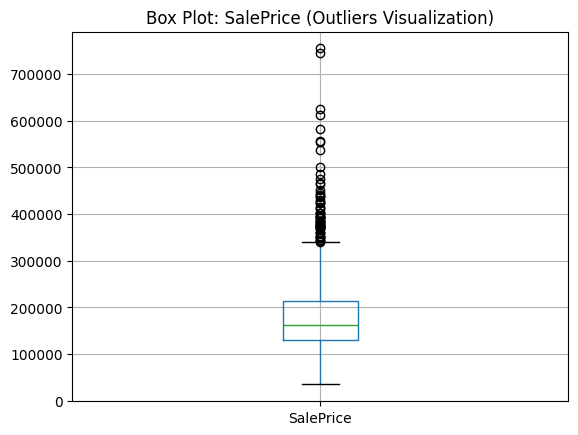

In [24]:
import matplotlib.pyplot as plt

# Box plot for SalePrice if available
if "SalePrice" in housing_clean.columns:
    plt.figure()
    housing_clean.boxplot(column="SalePrice")
    plt.title("Box Plot: SalePrice (Outliers Visualization)")
    plt.show()

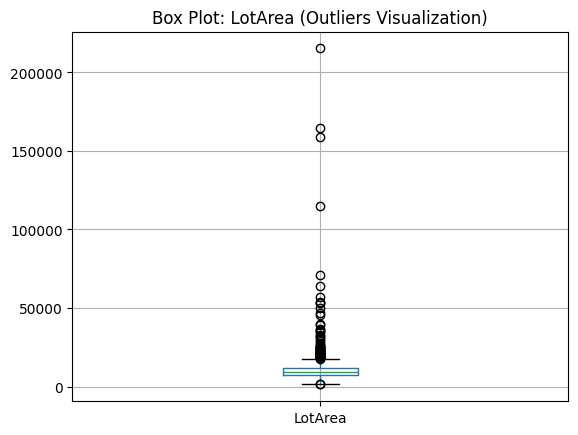

In [25]:
# Box plot for LotArea if available
if "LotArea" in housing_clean.columns:
    plt.figure()
    housing_clean.boxplot(column="LotArea")
    plt.title("Box Plot: LotArea (Outliers Visualization)")
    plt.show()

**Outlier strategies in housing:**
*  Keep them if they’re legitimate luxury or large-lot properties

*  Cap them with winsorization or percentile clipping
*  Log transform the variable
* Investigate and remove if it’s clearly an error (like LotArea = 99999999)

### **Optional: Winsorization / clipping pattern**

In [26]:
# Percentile clipping example for SalePrice if available
if "SalePrice" in housing_clean.columns:
    lower = housing_clean["SalePrice"].quantile(0.01)
    upper = housing_clean["SalePrice"].quantile(0.99)
    housing_clean["SalePrice_Clipped"] = housing_clean["SalePrice"].clip(lower, upper)

    print("Clipping thresholds for SalePrice:")
    print("1st percentile:", lower)
    print("99th percentile:", upper)

Clipping thresholds for SalePrice:
1st percentile: 61815.97
99th percentile: 442567.01000000053


**The Real Workflow:**

*  inspect structure
*  handle duplicates
*  handle missingness
*  transform and encode
*  bin meaningful continuous features
*  visualize and manage outliers
